In [1]:
#epsilon-greedy
def e_greedy(x,y,eps):
    prob = np.random.uniform()
    if prob<=eps:
        #choose randomly
        action = action_list[np.random.randint(4)]
        #print('action: ', action )
    else:
        #choose best
        action_idx = np.array(Q[(Q['x']==x) & (Q['y']==x)].value).argmax()
        action = action_list[action_idx]
        #print('action: ', action )
    return action

def apply_move(x,y, action):
    if action=='N' and y+1 in y_range:
        y+=1
    elif action=='S' and y-1 in y_range:
        y-=1
    elif action=='W' and x-1 in x_range:
        x-=1
    elif action=='E' and x+1 in x_range:
        x+=1
    else:
        action = e_greedy(x,y,eps)
        (x,y,action) = apply_move(x,y,action)
        #print('else states: ', x,y)
    return (x,y, action)

import numpy as np
import pandas as pd
import time

x_range = np.arange(1,9) # x-coordinates
y_range = np.arange(1,9) # y-coordinates
init = (2,2)
goal = (7,6)
gamma = .9
decr = .999 #decrement factor of epsilon
Q = pd.DataFrame(index=range(1, 8*8*4+1), columns=['x', 'y', 'a', 'value'])
Q['x'] = np.repeat(np.repeat(x_range,8),4)
Q['y'] = np.repeat(np.tile(y_range,8),4)
action_list = ['N', 'W', 'E', 'S']
Q['a'] = np.tile(action_list, 8*8)
Q.fillna(0,inplace=True)

episodes = 200
#eps = 1/episodes
eps=.9
start = time.time()
for epi in range(episodes):
    ite = 0
    x, y = init
    while (x, y) != goal:
        #print('state before: ', (x,y))
        #print('Q: ', Q[(Q['x']==x) & (Q['y']==y)])
        action = e_greedy(x,y,eps)
        (x_prime,y_prime, action) = apply_move(x,y, action)
        #if action in ['N', 'S']:
            #print ('updated y')
        #print('state after action: ', (x_prime,y_prime))
        mask = (Q['x']==x_prime) & (Q['y']==y_prime)
        if (x_prime, y_prime) == goal:
            #print('goal is reached')
            r = 100
            Q.loc[mask, 'value'] = 0
            #print('goal state value: ', Q.loc[mask, 'value'])
        else:
            r=0
        mask2 = (Q['x']==x) & (Q['y']==y) & (Q['a']==action)
        Q.loc[mask2, 'value'] = r + gamma * Q[mask].value.max()
        x = x_prime
        y = y_prime
        #print('reward: ', r  )
        #print('discounted value: ', gamma*Q[mask].value.max())
        #print('updated state value: ', Q.loc[mask2, 'value'])
        #print('Q after action: ', Q[(Q['x']==x) & (Q['y']==y)])
        ite+=1
    eps*=decr
    print('episode#: ', epi, 'iteration #: ', ite)
done = time.time()
print(done-start)

episode#:  0 iteration #:  135
episode#:  1 iteration #:  143
episode#:  2 iteration #:  79
episode#:  3 iteration #:  335
episode#:  4 iteration #:  183
episode#:  5 iteration #:  171
episode#:  6 iteration #:  27
episode#:  7 iteration #:  21
episode#:  8 iteration #:  29
episode#:  9 iteration #:  129
episode#:  10 iteration #:  25
episode#:  11 iteration #:  23
episode#:  12 iteration #:  97
episode#:  13 iteration #:  59
episode#:  14 iteration #:  15
episode#:  15 iteration #:  57
episode#:  16 iteration #:  267
episode#:  17 iteration #:  117
episode#:  18 iteration #:  53
episode#:  19 iteration #:  141
episode#:  20 iteration #:  47
episode#:  21 iteration #:  189
episode#:  22 iteration #:  43
episode#:  23 iteration #:  261
episode#:  24 iteration #:  175
episode#:  25 iteration #:  29
episode#:  26 iteration #:  79
episode#:  27 iteration #:  139
episode#:  28 iteration #:  65
episode#:  29 iteration #:  65
episode#:  30 iteration #:  73
episode#:  31 iteration #:  85
episo

<IPython.core.display.Javascript object>


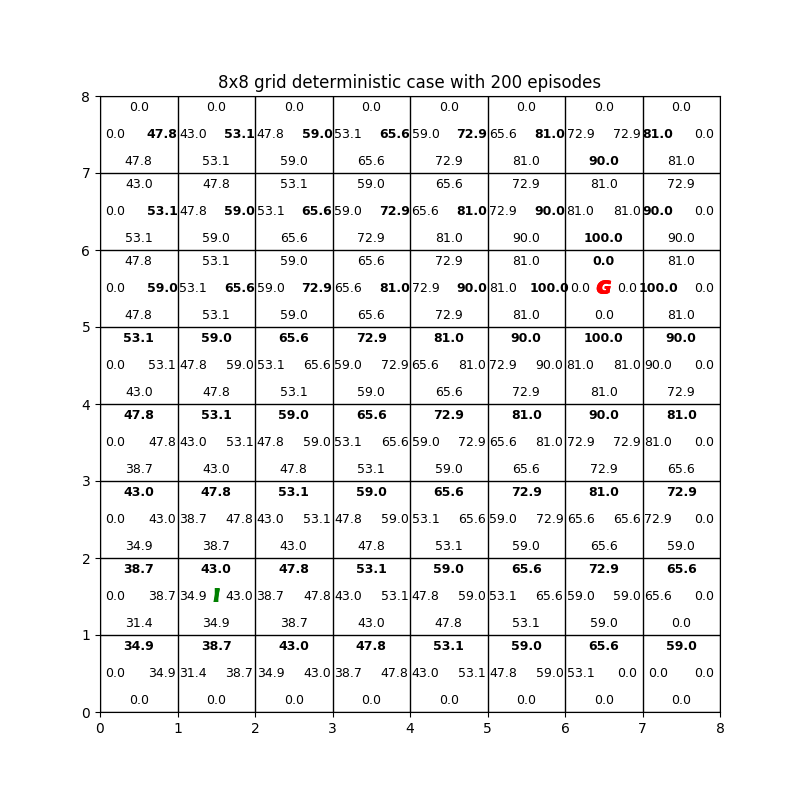

In [2]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
plt.grid(color='black', linestyle='-', linewidth=1)
ax.set_xlim(0,8)
ax.set_ylim(0,8)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)
plt.title('8x8 grid deterministic case with {} episodes'.format(episodes))
for i in x_range:
    for j in y_range:
        mask = (Q['x']==i) & (Q['y']==j)
        best_action_idx = np.array(Q[mask].value).argmax()
        w = ['regular']*4
        w[best_action_idx]='bold'
        best_action = action_list[best_action_idx]
        Q_array = np.around(np.asarray(Q[mask].value), 1)
        #north
        ax.text(i-0.5, j-.15, Q_array[0], fontsize=9,horizontalalignment='center', verticalalignment='center', weight=w[0])
        #west
        ax.text(i-.8, j-.5, Q_array[1], fontsize=9, horizontalalignment='center', verticalalignment='center', weight=w[1])
        #east
        ax.text(i-.2, j-.5, Q_array[2], fontsize=9,horizontalalignment='center', verticalalignment='center', weight=w[2])
        #south
        ax.text(i-0.5, j-.85, Q_array[3], fontsize=9,horizontalalignment='center', verticalalignment='center', weight=w[3])




In [6]:
plt.text(1.5, 1.5, 'I', fontsize=14, weight ='bold', color = 'green', style='italic', horizontalalignment='center', verticalalignment='center')
plt.text(6.5, 5.5, 'G', fontsize=14, weight ='bold', color = 'red', style='italic', horizontalalignment='center', verticalalignment='center')

Text(6.5,5.5,'G')